In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
#from keras.datasets import CIFAR100
import numpy as np
import tensorflow_datasets as tfds

C:\Users\PlayerPC\Miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
#(x_train,y_train), (x_test,y_test)=CIFAR100.load_data()
'''print(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))

builder = tfds.builder('cifar100')
info = builder.info
print(info)


x_train, y_train = tfds.as_numpy(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))'''
#x_test, y_test = tfds.as_numpy(tfds.load('cifar100', split='test', shuffle_files=True))
#print(ds)

#from eCIFAR100 import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
#x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_classes=100
input_shape = (32, 32, 3)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)


Train X=(50000, 32, 32, 3, 1), y=(50000, 100)
Train X=(50000, 32, 32, 3, 1), y=(50000, 100)
Test X=(10000, 32, 32, 3, 1), y=(10000, 100)
(32, 32, 3, 1)


In [7]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu",use_bias=True),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        #layers.Dropout(0.4),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]#52 Буквы, 10 цифрф
 )
print(model.output_shape)
print(str(model.summary()))

(None, 100)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                          

In [8]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

In [11]:
model.fit(x_train,y_train,batch_size=25,epochs=50,shuffle=True)

Epoch 1/50
2000/2000 [==============================] - 21s 11ms/step - loss: 2.6951 - accuracy: 0.3243
Epoch 2/50
2000/2000 [==============================] - 23s 12ms/step - loss: 2.6687 - accuracy: 0.3305
Epoch 3/50
2000/2000 [==============================] - 23s 11ms/step - loss: 2.6528 - accuracy: 0.3355
Epoch 4/50
2000/2000 [==============================] - 24s 12ms/step - loss: 2.6387 - accuracy: 0.3375
Epoch 5/50
2000/2000 [==============================] - 24s 12ms/step - loss: 2.6281 - accuracy: 0.3402
Epoch 6/50
2000/2000 [==============================] - 22s 11ms/step - loss: 2.6066 - accuracy: 0.3436
Epoch 7/50
2000/2000 [==============================] - 22s 11ms/step - loss: 2.5891 - accuracy: 0.3458
Epoch 8/50
2000/2000 [==============================] - 23s 11ms/step - loss: 2.5755 - accuracy: 0.3505
Epoch 9/50
2000/2000 [==============================] - 23s 11ms/step - loss: 2.5681 - accuracy: 0.3494
Epoch 10/50
2000/2000 [==============================] - 23s 11m

In [10]:
print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN/CIFAR100_learn_epoch_start.h5")
for i in range(6,20):
    print("Epoch "+str(i))
    model.save('saved_model_CNN/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=25,verbose=2)
print(str(results))
model.save("saved_model_CNN/CIFAR100_learn_done.h5")

x_train= (50000, 32, 32, 3, 1) y_train (50000, 100)
Epoch 6
2000/2000 [==============================] - 25s 11ms/step - loss: 4.0480 - accuracy: 0.0988 - val_loss: 3.7168 - val_accuracy: 0.1441
Epoch 7
2000/2000 [==============================] - 22s 11ms/step - loss: 3.5611 - accuracy: 0.1625 - val_loss: 3.3672 - val_accuracy: 0.1979
Epoch 8
2000/2000 [==============================] - 21s 11ms/step - loss: 3.3594 - accuracy: 0.1972 - val_loss: 3.1157 - val_accuracy: 0.2406
Epoch 9
2000/2000 [==============================] - 21s 10ms/step - loss: 3.2016 - accuracy: 0.2261 - val_loss: 3.1490 - val_accuracy: 0.2481
Epoch 10
2000/2000 [==============================] - 21s 11ms/step - loss: 3.0981 - accuracy: 0.2481 - val_loss: 2.9972 - val_accuracy: 0.2696
Epoch 11
2000/2000 [==============================] - 22s 11ms/step - loss: 3.0024 - accuracy: 0.2657 - val_loss: 2.8843 - val_accuracy: 0.2807
Epoch 12
2000/2000 [==============================] - 22s 11ms/step - loss: 2.9431 - acc

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [12]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN2/CIFAR100_learn_epoch_start.h5")
for i in range(1,10):
    print("Epoch "+str(i))
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN2/CIFAR100_learn_done.h5")

Epoch 1
2000/2000 [==============================] - 24s 12ms/step - loss: 2.6841 - accuracy: 0.3166 - val_loss: 2.4092 - val_accuracy: 0.3805
Epoch 2
2000/2000 [==============================] - 25s 12ms/step - loss: 2.6192 - accuracy: 0.3326 - val_loss: 2.3235 - val_accuracy: 0.3992
Epoch 3
2000/2000 [==============================] - 24s 12ms/step - loss: 2.5756 - accuracy: 0.3422 - val_loss: 2.3266 - val_accuracy: 0.3917
Epoch 4
2000/2000 [==============================] - 25s 12ms/step - loss: 2.5368 - accuracy: 0.3513 - val_loss: 2.2805 - val_accuracy: 0.4020
Epoch 5
2000/2000 [==============================] - 24s 12ms/step - loss: 2.4926 - accuracy: 0.3592 - val_loss: 2.2303 - val_accuracy: 0.4160
Epoch 6


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [13]:
model.load_weights("saved_model_CNN2/CIFAR100_learn_epoch_end=5.h5")
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [14]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN3/CIFAR100_learn_epoch_start.h5")
for i in range(1,3):
    print("Epoch "+str(i))
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN3/CIFAR100_learn_done.h5")

Epoch 1
2000/2000 [==============================] - 24s 12ms/step - loss: 2.4654 - accuracy: 0.3636 - val_loss: 2.2557 - val_accuracy: 0.4044
Epoch 2
2000/2000 [==============================] - 24s 12ms/step - loss: 2.4352 - accuracy: 0.3732 - val_loss: 2.1714 - val_accuracy: 0.4271
200/200 - 1s - loss: 2.1714 - accuracy: 0.4271 - 1s/epoch - 6ms/step
[2.171410322189331, 0.4271000027656555]


In [16]:
model.fit(x_train,y_train,batch_size=32,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1563/1563 [==============================] - 21s 13ms/step - loss: 2.2733 - accuracy: 0.4042 - val_loss: 2.0921 - val_accuracy: 0.4448
Epoch 2/3
1563/1563 [==============================] - 21s 14ms/step - loss: 2.2472 - accuracy: 0.4129 - val_loss: 2.0666 - val_accuracy: 0.4476
Epoch 3/3
1563/1563 [==============================] - 22s 14ms/step - loss: 2.2369 - accuracy: 0.4140 - val_loss: 2.0645 - val_accuracy: 0.4525


In [17]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.2209 - accuracy: 0.4157 - val_loss: 2.0795 - val_accuracy: 0.4492
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.1991 - accuracy: 0.4184 - val_loss: 2.0522 - val_accuracy: 0.4523
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.1925 - accuracy: 0.4217 - val_loss: 2.0335 - val_accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.1743 - accuracy: 0.4239 - val_loss: 2.0213 - val_accuracy: 0.4585
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.1636 - accuracy: 0.4289 - val_loss: 2.0201 - val_accuracy: 0.4609
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.1494 - accuracy: 0.4331 - val_loss: 2.0042 - val_accuracy: 0.4644
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.1429 - accuracy: 0.4324 - val_loss: 1.9779 -

In [21]:
model.save('CIFAR100_1.h5')
#model.load_weights("saved_model3/ECIFAR100_learn_epoch_start.h5")

In [22]:
model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.0942 - accuracy: 0.4418 - val_loss: 1.9700 - val_accuracy: 0.4715
Epoch 2/30
1563/1563 [==============================] - 21s 14ms/step - loss: 2.0925 - accuracy: 0.4433 - val_loss: 1.9655 - val_accuracy: 0.4738
Epoch 3/30
1563/1563 [==============================] - 21s 14ms/step - loss: 2.0743 - accuracy: 0.4512 - val_loss: 1.9847 - val_accuracy: 0.4668
Epoch 4/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0639 - accuracy: 0.4506 - val_loss: 1.9753 - val_accuracy: 0.4746
Epoch 5/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0485 - accuracy: 0.4538 - val_loss: 1.9540 - val_accuracy: 0.4771
Epoch 6/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0514 - accuracy: 0.4524 - val_loss: 1.9575 - val_accuracy: 0.4802
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0425 - accuracy: 0.4542 - val_loss: 1.9523 -

In [23]:
model.save('CIFAR100_2.h5')
model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.9070 - accuracy: 0.4835 - val_loss: 1.8719 - val_accuracy: 0.4963
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9058 - accuracy: 0.4848 - val_loss: 1.8619 - val_accuracy: 0.4974
Epoch 3/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9043 - accuracy: 0.4840 - val_loss: 1.8837 - val_accuracy: 0.4975
Epoch 4/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8987 - accuracy: 0.4819 - val_loss: 1.8678 - val_accuracy: 0.5003
Epoch 5/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8966 - accuracy: 0.4841 - val_loss: 1.8499 - val_accuracy: 0.5060
Epoch 6/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8837 - accuracy: 0.4886 - val_loss: 1.8619 - val_accuracy: 0.5009
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8914 - accuracy: 0.4874 - val_loss: 1.8714 -

In [24]:
model.save('CIFAR100_3.h5')
model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8308 - accuracy: 0.4985 - val_loss: 1.8766 - val_accuracy: 0.5007
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8169 - accuracy: 0.5021 - val_loss: 1.8336 - val_accuracy: 0.5061
Epoch 3/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8208 - accuracy: 0.5023 - val_loss: 1.8344 - val_accuracy: 0.5094
Epoch 4/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8174 - accuracy: 0.5047 - val_loss: 1.8169 - val_accuracy: 0.5136
Epoch 5/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8048 - accuracy: 0.5084 - val_loss: 1.8377 - val_accuracy: 0.5066
Epoch 6/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8103 - accuracy: 0.5043 - val_loss: 1.8161 - val_accuracy: 0.5090
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8026 - accuracy: 0.5082 - val_loss: 1.8223 -

In [25]:
model.save('CIFAR100_4.h5')
model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7630 - accuracy: 0.5160 - val_loss: 1.7889 - val_accuracy: 0.5164
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7624 - accuracy: 0.5156 - val_loss: 1.8045 - val_accuracy: 0.5145
Epoch 3/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7591 - accuracy: 0.5182 - val_loss: 1.8070 - val_accuracy: 0.5202
Epoch 4/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7503 - accuracy: 0.5180 - val_loss: 1.7918 - val_accuracy: 0.5217
Epoch 5/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7432 - accuracy: 0.5200 - val_loss: 1.8079 - val_accuracy: 0.5141
Epoch 6/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7536 - accuracy: 0.5201 - val_loss: 1.7884 - val_accuracy: 0.5177
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7481 - accuracy: 0.5168 - val_loss: 1.8080 -

In [28]:
for i in range(5,10):
    model.save('CIFAR100_'+str(i)+'.h5')
    model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6906 - accuracy: 0.5282 - val_loss: 1.7882 - val_accuracy: 0.5244
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6899 - accuracy: 0.5323 - val_loss: 1.7602 - val_accuracy: 0.5259
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6865 - accuracy: 0.5315 - val_loss: 1.7778 - val_accuracy: 0.5271
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6897 - accuracy: 0.5316 - val_loss: 1.7821 - val_accuracy: 0.5240
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6810 - accuracy: 0.5345 - val_loss: 1.7686 - val_accuracy: 0.5260
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6839 - accuracy: 0.5336 - val_loss: 1.7902 - val_accuracy: 0.5210
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6629 - accuracy: 0.5371 - val_loss: 1.7709 -

KeyboardInterrupt: 

In [29]:
model.save('CIFAR100_stopAdam.h5')

In [17]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adadelta(),
    metrics=['accuracy']
)

In [18]:
model.load_weights("CIFAR100_test1.h5")
model.save('CIFAR100_test2.h5')
model.fit(x_train,y_train,batch_size=32,epochs=1,validation_data=(x_test,y_test))

1563/1563 [==============================] - 22s 13ms/step - loss: 1.5624 - accuracy: 0.5583 - val_loss: 1.7325 - val_accuracy: 0.5393


In [ ]:
for i in range(11,15):
    model.save('CIFAR100_'+str(i)+'.h5')
    model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5586 - accuracy: 0.5607 - val_loss: 1.7324 - val_accuracy: 0.5392
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5592 - accuracy: 0.5608 - val_loss: 1.7322 - val_accuracy: 0.5405
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5515 - accuracy: 0.5617 - val_loss: 1.7328 - val_accuracy: 0.5395
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5582 - accuracy: 0.5617 - val_loss: 1.7323 - val_accuracy: 0.5388
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5603 - accuracy: 0.5612 - val_loss: 1.7302 - val_accuracy: 0.5400
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5618 - accuracy: 0.5599 - val_loss: 1.7298 - val_accuracy: 0.5392
Epoch 7/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5471 - accuracy: 0.5616 - val_loss: 1.7318 -

313/313 - 1s - loss: 0.0398 - accuracy: 0.9875 - 1s/epoch - 3ms/step
[0.039796166121959686, 0.987500011920929]
8440
(28, 28, 3)
(28, 28, 1)
1/1 [==============================] - 0s 24ms/step
9


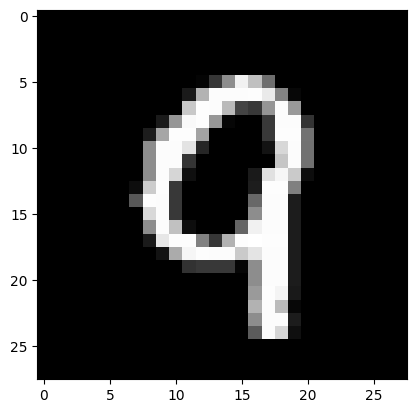

In [12]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==7):
        value=id
        break
        


#print(x_train[value].shape)

single=x_train[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y,x,c]=single[y][x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28,28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y][x]=single[y][x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [13]:
model.save('saved_model_CNN/CIFAR100_byclass_done.h5')

In [14]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=22
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0
'''for v in y_train:
    if(v==id):
        print(id,v)
        ShowImage(v)
        currentIteration+=1
        id+=1    
    if(currentIteration==10):
        break'''


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()

In [17]:
from PIL import Image
IMG = np.asarray(Image.open('E:/JupyterLab/Tensorflow_FKI_fall_2022/2022.10.07/Segmented/9.png'))

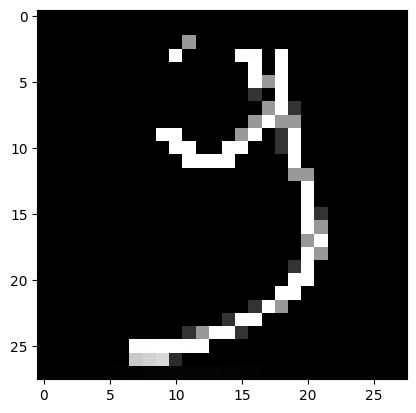

(28, 28, 3)
(1, 28, 28)


In [30]:
plt.imshow(IMG)
plt.show()
print(IMG.shape)

IMG_2=np.zeros((1,28,28),dtype="float32")

for x in range(28):
    for y in range(28):
        IMG_2[0][x][y]=IMG[x][y][0]/255.
print(IMG_2.shape)

In [32]:
print(model.predict(IMG_2,batch_size=1).argmax())

1/1 [==============================] - 0s 26ms/step
3
